<a href="https://colab.research.google.com/github/s-abinash/Deeplearning-with-Tensorflow/blob/master/Fashion_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification: Fashion MNIST using DNN



In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

#Another Dataset
#mnist = tf.keras.datasets.mnist -Dataset with handwritten letters 28*28 size

(x_train, y_train),(x_test, y_test) = mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


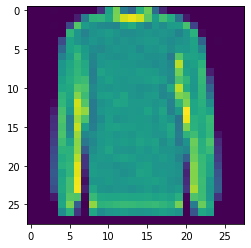

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[45])

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

We are going to train a 3 layer neural net. Input layer will be flattened. Output layer must have the count(label) as output.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):                                                            #Replace with get('acc') if doesn't work
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks=myCallback()
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),                                                                  #Flattern the image. It will automatically convert 28*28 into 784*1 array
tf.keras.layers.Dense(512,activation=tf.nn.relu),                            #Hidden Layer with 512 neurons, with relu activation
tf.keras.layers.Dense(10,activation=tf.nn.softmax)                        #Output Layer. Note: Neuron size should be equal to number of labels in the dataset. 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4731 - accuracy: 0.8289
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3570 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3243 - accuracy: 0.8807
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2989 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2787 - accuracy: 0.8962


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8746


[0.34516939520835876, 0.8745999932289124]